# Insurance Claims- Fraud Detection

**Problem Statement:** To construct a model to predict whether a transaction is fraudulent or not. We have a dataset of Automobile insurance and we need a model that identify if an insurance claim is fradulent or no.

**Identifying Type:** The target variable says YES/NO, is a Binary Classification task. Hence we will be trying classification Algorithms.

### IMPORTING LIBRARIES

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

### LOADING THE DATA

In [277]:
#loading data saved in .csv format
df= pd.read_csv("insurance_fraud.csv")
df=pd.DataFrame(data=df)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [278]:
# Column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [279]:
# data size
df.shape

(1000, 40)

In [280]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [281]:
#Statistical info
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000,NaN,NaN,NaN,203.954,115.113,0,115.75,199.5,276.25,479
age,1000,NaN,NaN,NaN,38.948,9.14029,19,32,38,44,64
policy_number,1000,NaN,NaN,NaN,546239,257063,100804,335980,533135,759100,999435
policy_bind_date,1000,951,05-08-1992,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_csl,1000,3,250/500,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000,NaN,NaN,NaN,1136,611.865,500,500,1000,2000,2000
policy_annual_premium,1000,NaN,NaN,NaN,1256.41,244.167,433.33,1089.61,1257.2,1415.69,2047.59
umbrella_limit,1000,NaN,NaN,NaN,1.101e+06,2.29741e+06,-1e+06,0,0,0,1e+07
insured_zip,1000,NaN,NaN,NaN,501214,71701.6,430104,448404,466446,603251,620962


No missing values identified.  
column '_c39' is unwanted and hence i will be dropping the same.  
Also policy_number could be irrelevant as well and hence we can drop that as well.  
Age ranges from 19-64yrs  
Policy annual premium ranges from 433-2043  


### EXPLORATORY DATA ANALYSIS

In [282]:
# There are '?' in the datset which we will replace by NaN Values
df = df.replace('?',np.NaN)

In [283]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [284]:
# there are null values in columns collision_type, property_damage and police_report_available.
# Lets replace the null values with most frequent value
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)
df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

In [285]:
df.isnull().any().any()

True

In [286]:
# Lets delete policy_number column
df=df.drop(['policy_number','_c39'] ,axis=1)

**VISUALIZATION**

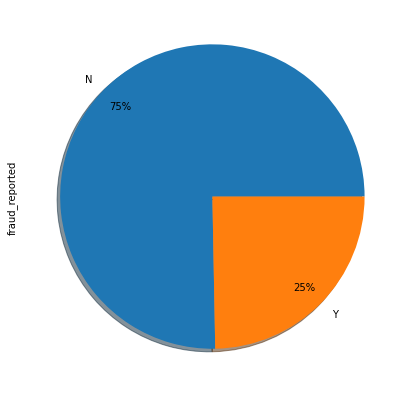

In [287]:
# Plotting target variable
plt.figure(figsize=(7,7))
df['fraud_reported'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

25% claim is approved.  
75% claim rejected due to various reasons.

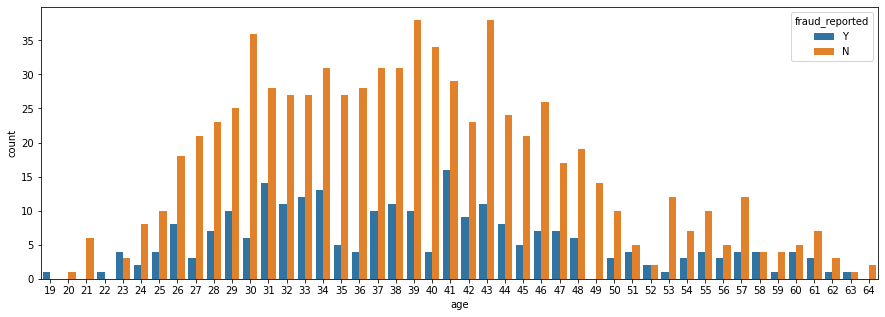

In [288]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', hue='fraud_reported', data=df)
plt.show()

we cannot identify a specific pattern here.

In [289]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

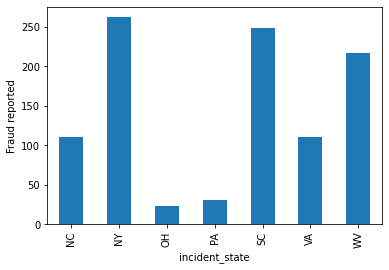

In [290]:
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Highest fraud reported is in NY newyork, SC south carolina and WV west virginia

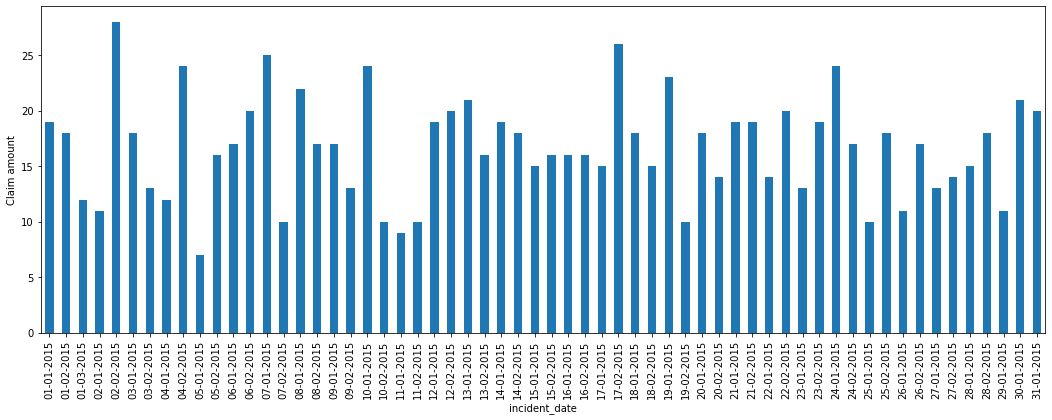

In [291]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount')
plt.show()

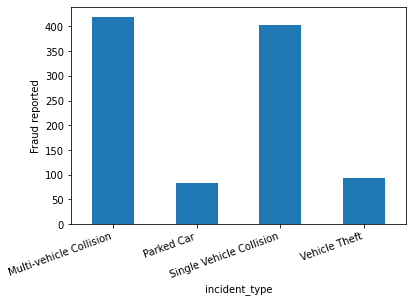

In [292]:
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

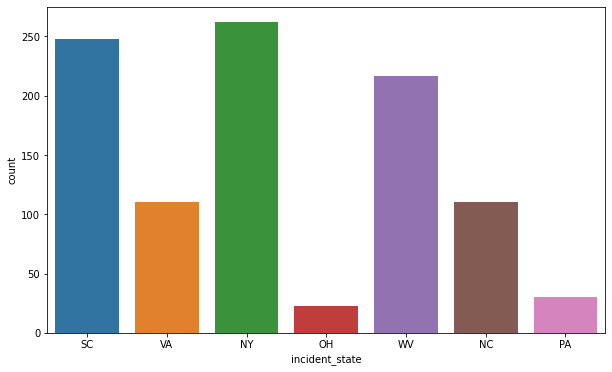

In [293]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

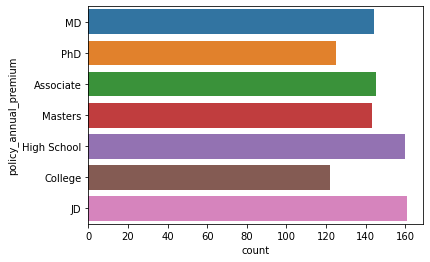

In [294]:
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

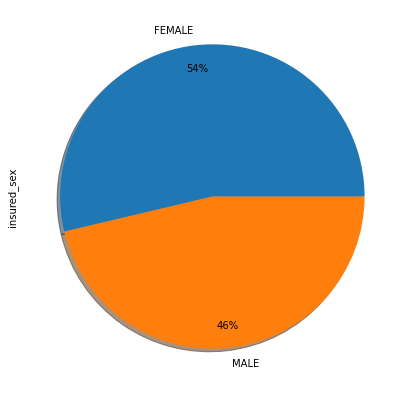

In [295]:
plt.figure(figsize=(7,7))
df['insured_sex'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

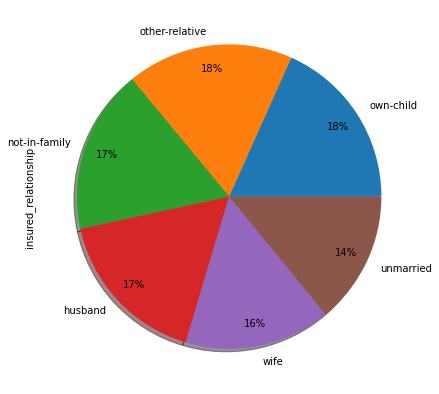

In [296]:
plt.figure(figsize=(7,7))
df['insured_relationship'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

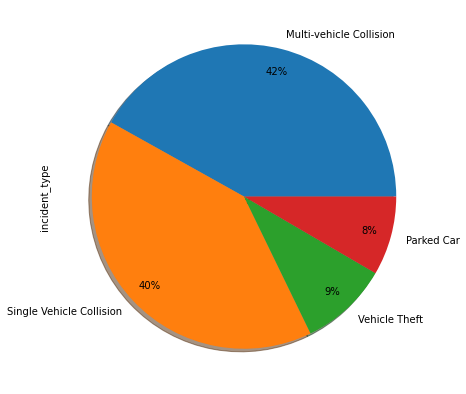

In [297]:
plt.figure(figsize=(7,7))
df['incident_type'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

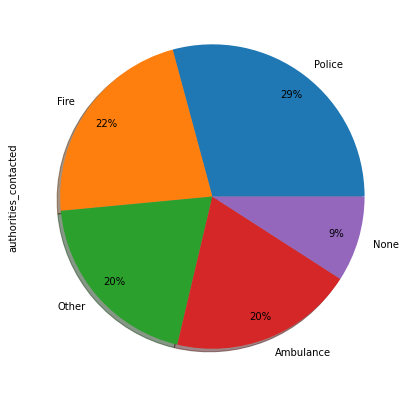

In [298]:
plt.figure(figsize=(7,7))
df['authorities_contacted'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

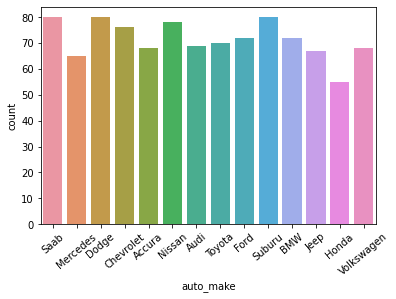

In [299]:
sns.countplot(x='auto_make', data=df)
plt.xticks(rotation=40)
plt.show()

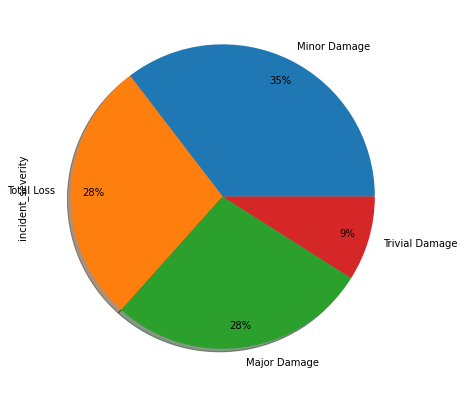

In [300]:
plt.figure(figsize=(7,7))
df['incident_severity'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)
plt.show()

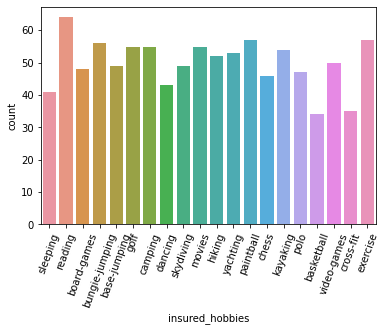

In [301]:
sns.countplot(x='insured_hobbies', data=df)
plt.xticks(rotation=70)
plt.show()

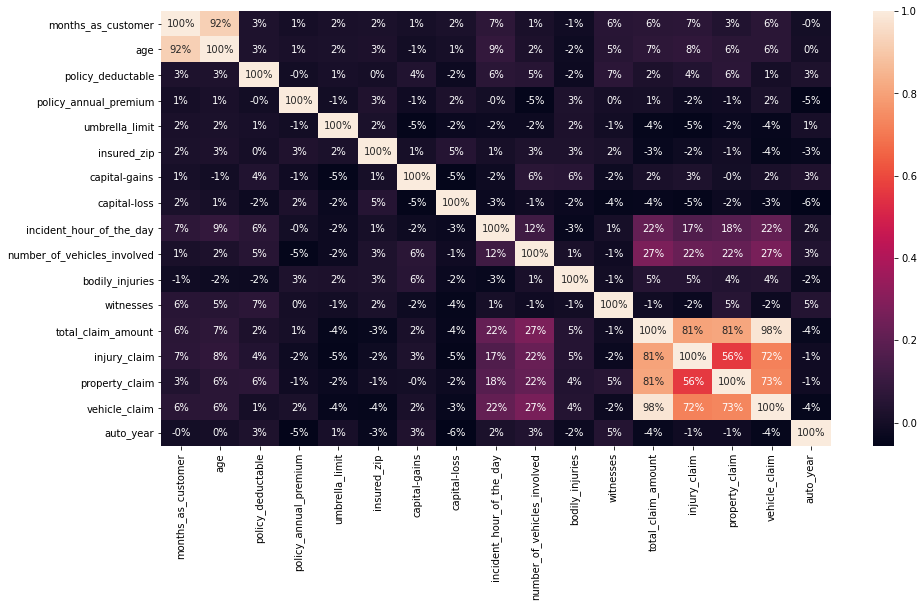

In [302]:
#Heat map to see correlation of numeric variables.
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

**FEATURE ENGINEERING**

In [303]:
# converting target column to numeric with Label encoding
df['fraud_reported'] = LabelEncoder().fit_transform(df['fraud_reported'])

In [304]:
# Lets remove some more irrelevant columns
df = df.drop(columns = [ 
    'policy_csl',
    'insured_zip',
    'policy_bind_date', 
    'incident_date', 
    'incident_location',  
    'auto_year', 
    'incident_hour_of_the_day'])

In [305]:
df._get_numeric_data().head()  # Checking numeric columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1406.91,0,53300,0,1,1,2,71610,6510,13020,52080,1
1,228,42,2000,1197.22,5000000,0,0,1,0,0,5070,780,780,3510,1
2,134,29,2000,1413.14,5000000,35100,0,3,2,3,34650,7700,3850,23100,0
3,256,41,2000,1415.74,6000000,48900,-62400,1,1,2,63400,6340,6340,50720,1
4,228,44,1000,1583.91,6000000,66000,-46000,1,0,1,6500,1300,650,4550,0


In [306]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [307]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')

In [308]:
# converting all other categoric columns to numeric with one hot encoding.

df_dummies= pd.get_dummies(df)
df_dummies.head(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### MODELLING

In [313]:
# Creating dependent and independent variable.
y= df['fraud_reported']
x= df_dummies.drop('fraud_reported', axis=1)

In [314]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.22,random_state=1)

**RANDOM FOREST CLASSIFIER**

In [317]:
rfc= RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100,max_depth=6,min_samples_leaf=8)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))

Confusion Matrix: [[158   1]
 [ 61   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.72      0.99      0.84       159
           1       0.00      0.00      0.00        61

    accuracy                           0.72       220
   macro avg       0.36      0.50      0.42       220
weighted avg       0.52      0.72      0.60       220

Accuracy score: 0.7181818181818181


In [323]:
# Cross Validated score for RFC.
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for RFC is:",scr2.mean())

Cross Validated score for RFC is: 0.757


**DECISION TREE CLASSIFIER**

In [319]:
dtc= DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6,min_samples_leaf=8)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[153   6]
 [ 37  24]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.96      0.88       159
           1       0.80      0.39      0.53        61

    accuracy                           0.80       220
   macro avg       0.80      0.68      0.70       220
weighted avg       0.80      0.80      0.78       220

Accuracy Score: 0.8045454545454546


In [322]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.8480000000000001


**roc-auc curve**

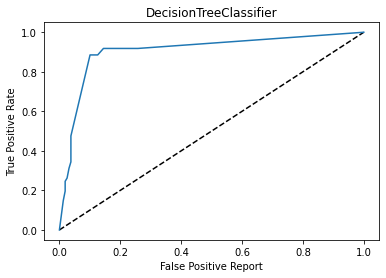

In [326]:
y_pred_prob= dtc.predict_proba(x_test)[:,1]

fpr,tpr,thresholds=  roc_curve(y_test,y_pred_prob )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False Positive Report')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.show()

### SAVING MODEL

In [328]:
import pickle
# save the model to disk
filename = 'finalized_insurancefraud.pkl'
pickle.dump(dtc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])